In [1]:
import pandas as pd

coffee = pd.read_csv("coffee.csv")

coffee

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,1/1/2023,7:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,1/1/2023,7:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,1/1/2023,7:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,1/1/2023,7:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,1/1/2023,7:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
...,...,...,...,...,...,...,...,...,...,...,...
149111,149452,30/6/2023,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg
149112,149453,30/6/2023,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg
149113,149454,30/6/2023,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg
149114,149455,30/6/2023,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino


In [2]:
coffee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   transaction_id    149116 non-null  int64  
 1   transaction_date  149116 non-null  object 
 2   transaction_time  149116 non-null  object 
 3   transaction_qty   149116 non-null  int64  
 4   store_id          149116 non-null  int64  
 5   store_location    149116 non-null  object 
 6   product_id        149116 non-null  int64  
 7   unit_price        149116 non-null  float64
 8   product_category  149116 non-null  object 
 9   product_type      149116 non-null  object 
 10  product_detail    149116 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 12.5+ MB


In [13]:
# Group by 'product_category' and 'product_type', then sum the 'transaction_qty'
total_orders = coffee.groupby(['product_category', 'product_type'])['transaction_qty'].sum().reset_index()

# Rename columns for clarity
total_orders.columns = ['category', 'product', 'total_order']


total_orders_df = pd.DataFrame(total_orders)
total_orders


,category,product,total_order
0,Bakery,Biscotti,5788
1,Bakery,Pastry,6961
2,Bakery,Scone,10465
3,Branded,Clothing,221
4,Branded,Housewares,555
5,Coffee,Barista Espresso,24943
6,Coffee,Drip coffee,12891
7,Coffee,Gourmet brewed coffee,25973
8,Coffee,Organic brewed coffee,13012
9,Coffee,Premium brewed coffee,12431


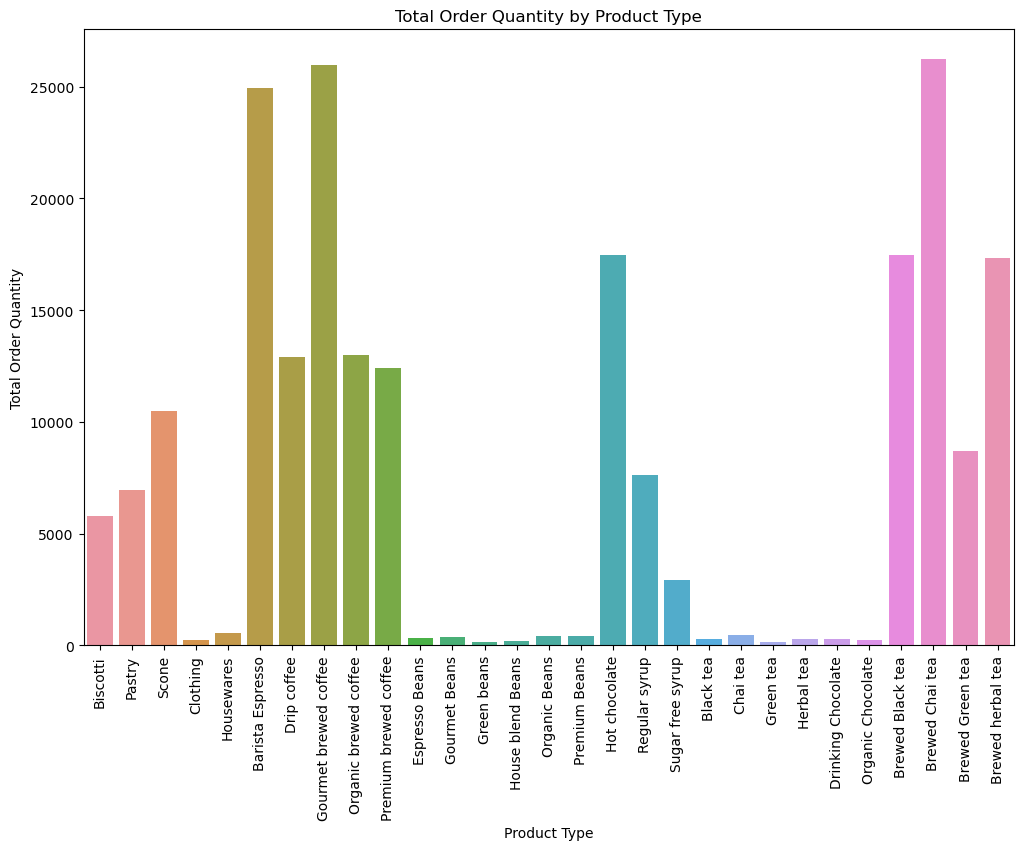

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
#total_orders.plot(x="product", y="total_order")

# Create the plot
plt.figure(figsize=(12, 8))

# Use seaborn to create a bar plot
sns.barplot(data=total_orders, x='product', y='total_order')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Set the title and labels
plt.title('Total Order Quantity by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Total Order Quantity')

# Show the plot
plt.show()
